In [37]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gradio as gr
import seaborn as sns

In [28]:
#Loading the dataset
data = pd.read_csv("data.csv",on_bad_lines = 'skip')
print(data.head())

      password  strength
0     kzde5577       1.0
1     kino3434       1.0
2    visi7k1yr       1.0
3     megzy123       1.0
4  lamborghin1       1.0


The data set has two columns: 1.password and 2. strength

1.  0 means the password's strength is weak

2.  1 means the password's strength is medium 

3.  2 means the password's strength is strong

In [29]:
#Converting 0, 1, and 2 values in the strength column to weak,medium and strong
data = data.dropna()
data["strength"] = data["strength"].map({0: "Weak", 
                                         1: "Medium",
                                         2: "Strong"})
print(data.sample(5))

                password strength
533594  T8aHOkjk3MgaAujb   Strong
403709        1977peneke   Medium
668901          amati991   Medium
33319          arigato17   Medium
525422  Ch88PHTAyMwCQ8Gs   Strong


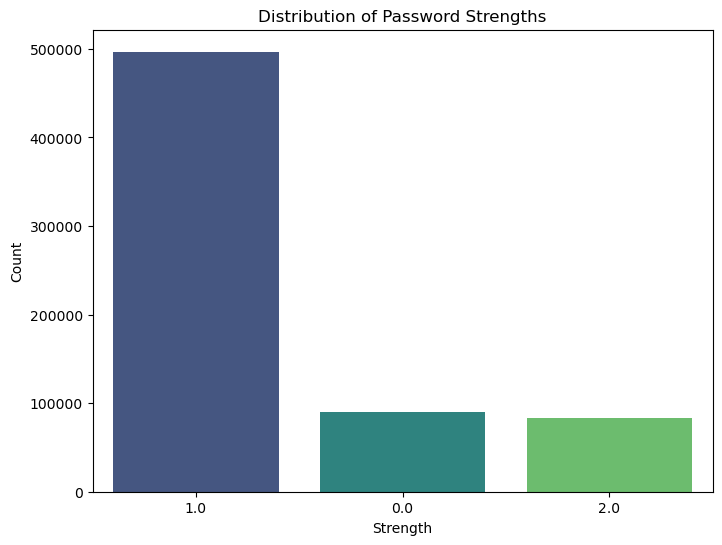

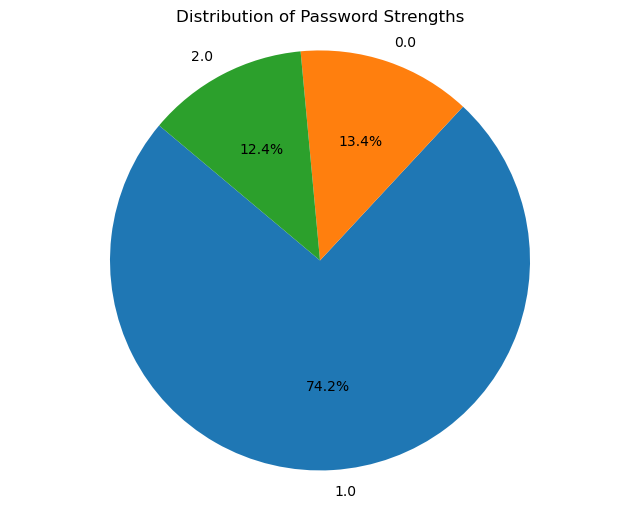

In [44]:
#visualising data
# Create DataFrame
data = pd.read_csv("data.csv",on_bad_lines = 'skip')
df = pd.DataFrame(data)

# Count the occurrences of each password strength
strength_counts = df['strength'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='strength', order=strength_counts.index, palette='viridis')
plt.title('Distribution of Password Strengths')
plt.xlabel('Strength')
plt.ylabel('Count')
plt.show()
# Create DataFrame
df = pd.DataFrame(data)

# Count the occurrences of each password strength
strength_counts = df['strength'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(strength_counts, labels=strength_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Password Strengths')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [32]:
#tokenize and split the data into training and test sets
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character
  
x = np.array(data["password"])
y = np.array(data["strength"])

tdif = TfidfVectorizer(tokenizer=word,token_pattern=None)
x = tdif.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.01, 
                                                random_state=42)

In [33]:
#Training the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8158877109153352


In [34]:
# Function to check password strength using the trained model
def predict_password_strength(password):
    data = tdif.transform([password])
    output = model.predict(data)
    return output[0]

interface = gr.Interface(
    fn=predict_password_strength, 
    inputs="textbox",
    outputs="textbox",
    title="Password Strength Checker",
    description="Enter a password to check its strength (Weak, Medium, Strong)"
)

# Launch the app
if __name__ == "__main__":
    interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
